In [1]:
import numpy as np
import pandas as pd

from sklearn import tree
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import f1_score, average_precision_score, precision_score, recall_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# by data_exploration_feature_selection_kospi.ipynb
select_col = ['Market_cap(1YRF)', 'Funding_cost(avg)', 'Reservation_rate', 'Intangibel_assets', 'Funding_cost(final)']

In [3]:
df = pd.read_excel("EDA_final_0128.xlsx")

In [4]:
df.head(3)

,Unnamed: 0,Symbol,Name,결산월,회계년,주기,타인자본비율(%),자기자본비율(%),차입금의존도(%),현금및현금성자산구성비율(%),...,현금흐름/영업수익(%),현금흐름/총부채(%),현금흐름/총자본(%),현금흐름/총자산(%),현금흐름/총차입부채(%),유보율(%),유보액/총자산(%),시가총액(1YRF),시가총액(2YRF),Target
0,368,A005930,삼성전자,12.0,2017,Annual,28.92,71.08,6.23,10.12,...,26.49,81.12,31.15,22.51,372.25,23681.42,70.44,231030585,328942963,0
1,369,A000660,SK하이닉스,12.0,2017,Annual,25.53,74.47,9.18,6.50,...,52.04,158.34,54.17,40.36,368.34,845.61,68.10,44044143,55692181,0
2,370,A068270,셀트리온,12.0,2017,Annual,26.65,73.35,19.33,12.64,...,50.62,56.30,20.75,15.16,72.80,1823.77,67.48,27913990,27121546,0


In [5]:
df.shape

(1132, 27)

In [6]:
# 한글 도메인을 영문으로 변경

col = {'결산월':'settle_month',
       '회계년':'Fiscal_year',
       '주기':'cycle',
       '타인자본비율(%)':'Captal_ratio_others',
       '자기자본비율(%)':'Equity_Capital_Ratio',
       '차입금의존도(%)':'Borrowing_dependence',
       '현금및현금성자산구성비율(%)':'Cash_cash_equivalents',
       '유형자산구성비율(%)':'Tangible_assets',
       '무형자산구성비율(%)':'Intangibel_assets',
       '부채비율(%)':'Debt_ratio',
       '차입금비율(%)':'Borrowings_ratio',
       '총자산/총자본(%)':'Total_assets/Total_capital',
       '차입부채조달금리(평균)(%)':'Funding_cost(avg)',
       '차입부채조달금리(기말)(%)':'Funding_cost(final)',
       '현금흐름/영업수익(%)':'Cash/operating_revenue ',
       '현금흐름/총부채(%)':'CashF/debt',
       '현금흐름/총자본(%)':'CashF/total_capital',
       '현금흐름/총자산(%)':'CashF/total_asset',
       '현금흐름/총차입부채(%)':'CashF/total_Debt',
       '유보율(%)':'Reservation_rate',
       '유보액/총자산(%)':'Reservation/total_asset',
       '시가총액(1YRF)':'Market_cap(1YRF)',
       '시가총액(2YRF)':'Market_cap(2YRF)'
       }

df.rename(columns=col, inplace = True)

In [7]:
df.head(3)

,Unnamed: 0,Symbol,Name,settle_month,Fiscal_year,cycle,Captal_ratio_others,Equity_Capital_Ratio,Borrowing_dependence,Cash_cash_equivalents,...,Cash/operating_revenue,CashF/debt,CashF/total_capital,CashF/total_asset,CashF/total_Debt,Reservation_rate,Reservation/total_asset,Market_cap(1YRF),Market_cap(2YRF),Target
0,368,A005930,삼성전자,12.0,2017,Annual,28.92,71.08,6.23,10.12,...,26.49,81.12,31.15,22.51,372.25,23681.42,70.44,231030585,328942963,0
1,369,A000660,SK하이닉스,12.0,2017,Annual,25.53,74.47,9.18,6.50,...,52.04,158.34,54.17,40.36,368.34,845.61,68.10,44044143,55692181,0
2,370,A068270,셀트리온,12.0,2017,Annual,26.65,73.35,19.33,12.64,...,50.62,56.30,20.75,15.16,72.80,1823.77,67.48,27913990,27121546,0


Text(0.5, 1.0, 'Class Distributions \n (0: Listed || Dislisted: Fraud)')

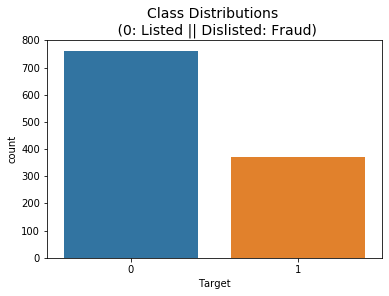

In [8]:
sns.countplot('Target', data=df)
plt.title('Class Distributions \n (0: Listed || Dislisted: Fraud)', fontsize=14)

In [9]:
# Random over-sampling
# Class count
count_0, count_1 = df.Target.value_counts()

# Divide by class
df_class_0 = df[df['Target'] == 0]
df_class_1 = df[df['Target'] == 1]

Random over-sampling:
1    762
0    762
Name: Target, dtype: int64


Text(0.5, 1.0, 'Class Distributions \n (0: Listed || Dislisted: Fraud)')

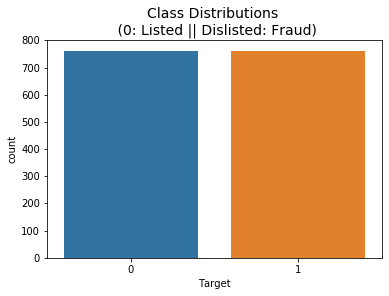

In [10]:
df_class_1_over = df_class_1.sample(count_0, replace=True)
df_test_over = pd.concat([df_class_0, df_class_1_over], axis=0)

print('Random over-sampling:')
print(df_test_over.Target.value_counts())

#df_test_over.Target.value_counts().plot(kind='bar', title='Count (target)');

sns.countplot('Target', data=df_test_over)
plt.title('Class Distributions \n (0: Listed || Dislisted: Fraud)', fontsize=14)

In [11]:
# 의미있는 feature만을 사용
x = df_test_over[select_col]
#x = df_test_over.drop(["Target", "Name", "Unnamed: 0","Symbol", "settle_month","Fiscal_year","cycle"], axis = 1)
y = df_test_over.Target

In [12]:
train_X, val_X, train_y, val_y = train_test_split(x, y, random_state = 0)

In [50]:
# 로지스틱회귀

logreg = LogisticRegression()
logreg.fit(train_X, train_y)
y_pred = logreg.predict(val_X)
print("Accuracy:", logreg.score(val_X, val_y))
print("Precision:", precision_score(val_y, y_pred))
print("Recall:", recall_score(val_y, y_pred))
print("F1:", f1_score(val_y, y_pred))
print("Area under precision Recall:", average_precision_score(val_y, y_pred))

logreg_result = {}

logreg_result['accuracy'] = round(logreg.score(val_X, val_y),4)
logreg_result['precision'] = round(precision_score(val_y, y_pred),4)
logreg_result['recall'] = round(recall_score(val_y, y_pred),4)
logreg_result['F1'] = round(f1_score(val_y, y_pred),4)
logreg_result['Area under precision Recall'] = round(average_precision_score(val_y, y_pred),4)

Accuracy: 0.8136482939632546
Precision: 0.7914438502673797
Recall: 0.8222222222222222
F1: 0.8065395095367848
Area under precision Recall: 0.7347322226432926


In [14]:
# k-최근접 이웃 

neiclassifier = KNeighborsClassifier(n_neighbors=2)  
neiclassifier.fit(train_X, train_y)
y_pred = neiclassifier.predict(val_X)
print("Accuracy:", neiclassifier.score(val_X, val_y))
print("Precision:", precision_score(val_y, y_pred))
print("Recall:", recall_score(val_y, y_pred))
print("F1:", f1_score(val_y, y_pred))
print("Area under precision Recall:", average_precision_score(val_y, y_pred))

kn_result = {}

kn_result['accuracy'] = round(neiclassifier.score(val_X, val_y),4)
kn_result['precision'] = round(precision_score(val_y, y_pred),4)
kn_result['recall'] = round(recall_score(val_y, y_pred),4)
kn_result['F1'] = round(f1_score(val_y, y_pred),4)
kn_result['Area under precision Recall'] = round(average_precision_score(val_y, y_pred),4)

Accuracy: 0.8293963254593176
Precision: 0.852760736196319
Recall: 0.7722222222222223
F1: 0.8104956268221575
Area under precision Recall: 0.76613233928581


In [15]:
# 의사결정트리

treeclassifier = tree.DecisionTreeClassifier(criterion = 'entropy', max_depth = 4, random_state=0)  
treeclassifier.fit(train_X, train_y)
y_pred = treeclassifier.predict(val_X)
print("Accuracy:", treeclassifier.score(val_X, val_y))
print("Precision:", precision_score(val_y, y_pred))
print("Recall:", recall_score(val_y, y_pred))
print("F1:", f1_score(val_y, y_pred))
print("Area under precision Recall:", average_precision_score(val_y, y_pred))

dt_result = {}

dt_result['accuracy'] = round(treeclassifier.score(val_X, val_y),4)
dt_result['precision'] = round(precision_score(val_y, y_pred),4)
dt_result['recall'] = round(recall_score(val_y, y_pred),4)
dt_result['F1'] = round(f1_score(val_y, y_pred),4)
dt_result['Area under precision Recall'] = round(average_precision_score(val_y, y_pred),4)

Accuracy: 0.8582677165354331
Precision: 0.842391304347826
Recall: 0.8611111111111112
F1: 0.8516483516483516
Area under precision Recall: 0.7910093099775571


In [16]:
# 랜덤포레스트

forest = RandomForestClassifier(random_state=0)
forest.fit(train_X, train_y)
y_pred = forest.predict(val_X)
print("Accuracy:", forest.score(val_X, val_y))
print("Precision:", precision_score(val_y, y_pred))
print("Recall:", recall_score(val_y, y_pred))
print("F1:", f1_score(val_y, y_pred))
print("Area under precision Recall:", average_precision_score(val_y, y_pred))

rf_result = {}

rf_result['accuracy'] = round(forest.score(val_X, val_y),4)
rf_result['precision'] = round(precision_score(val_y, y_pred),4)
rf_result['recall'] = round(recall_score(val_y, y_pred),4)
rf_result['F1'] = round(f1_score(val_y, y_pred),4)
rf_result['Area under precision Recall'] = round(average_precision_score(val_y, y_pred),4)

Accuracy: 0.9343832020997376
Precision: 0.8934010152284264
Recall: 0.9777777777777777
F1: 0.9336870026525198
Area under precision Recall: 0.8840463469985034


In [17]:
# 아다부스트

ada = AdaBoostClassifier(random_state=0)
ada.fit(train_X, train_y)
y_pred = ada.predict(val_X)
print("Accuracy:", ada.score(val_X, val_y))
print("Precision:", precision_score(val_y, y_pred))
print("Recall:", recall_score(val_y, y_pred))
print("F1:", f1_score(val_y, y_pred))
print("Area under precision Recall:", average_precision_score(val_y, y_pred))

ada_result = {}

ada_result['accuracy'] = round(ada.score(val_X, val_y),4)
ada_result['precision'] = round(precision_score(val_y, y_pred),4)
ada_result['recall'] = round(recall_score(val_y, y_pred),4)
ada_result['F1'] = round(f1_score(val_y, y_pred),4)
ada_result['Area under precision Recall'] = round(average_precision_score(val_y, y_pred),4)

Accuracy: 0.8871391076115486
Precision: 0.8624338624338624
Recall: 0.9055555555555556
F1: 0.8834688346883468
Area under precision Recall: 0.8256011979983983


In [18]:
# 그레디언트부스팅

gred = GradientBoostingClassifier(random_state=0)
gred.fit(train_X, train_y)
y_pred = gred.predict(val_X)
print("Accuracy:", gred.score(val_X, val_y))
print("Precision:", precision_score(val_y, y_pred))
print("Recall:", recall_score(val_y, y_pred))
print("F1:", f1_score(val_y, y_pred))
print("Area under precision Recall:", average_precision_score(val_y, y_pred))

gred_result = {}

gred_result['accuracy'] = round(gred.score(val_X, val_y),4)
gred_result['precision'] = round(precision_score(val_y, y_pred),4)
gred_result['recall'] = round(recall_score(val_y, y_pred),4)
gred_result['F1'] = round(f1_score(val_y, y_pred),4)
gred_result['Area under precision Recall'] = round(average_precision_score(val_y, y_pred),4)

Accuracy: 0.9081364829396326
Precision: 0.8795811518324608
Recall: 0.9333333333333333
F1: 0.9056603773584906
Area under precision Recall: 0.8524384713690893


In [19]:
# XgBoosting

xgbs = XGBClassifier(random_state=0)
xgbs.fit(train_X, train_y)
y_pred = xgbs.predict(val_X)
print("Accuracy:", xgbs.score(val_X, val_y))
print("Precision:", precision_score(val_y, y_pred))
print("Recall:", recall_score(val_y, y_pred))
print("F1:", f1_score(val_y, y_pred))
print("Area under precision Recall:", average_precision_score(val_y, y_pred))

xgbs_result = {}

xgbs_result['accuracy'] = round(xgbs.score(val_X, val_y),4)
xgbs_result['precision'] = round(precision_score(val_y, y_pred),4)
xgbs_result['recall'] = round(recall_score(val_y, y_pred),4)
xgbs_result['F1'] = round(f1_score(val_y, y_pred),4)
xgbs_result['Area under precision Recall'] = round(average_precision_score(val_y, y_pred),4)


Accuracy: 0.89501312335958
Precision: 0.8723404255319149
Recall: 0.9111111111111111
F1: 0.891304347826087
Area under precision Recall: 0.8367938050296905


In [49]:
final_results = pd.DataFrame([logreg_result, kn_result,dt_result,rf_result,ada_result,gred_result,xgbs_result],
                            index=['Logistic Regression', 'k-nearest neighbor', 'Decision Tree', 'Random Forest',
                                  'Ada boost', 'Gredient Boost', 'XGBoost'])
final_results

,accuracy,precision,recall,F1,Area under precision Recall
Logistic Regression,0.8136,0.7914,0.8222,0.8065,0.7347
k-nearest neighbor,0.8294,0.8528,0.7722,0.8105,0.7661
Decision Tree,0.8583,0.8424,0.8611,0.8516,0.7910
Random Forest,0.9344,0.8934,0.9778,0.9337,0.8840
Ada boost,0.8871,0.8624,0.9056,0.8835,0.8256
Gredient Boost,0.9081,0.8796,0.9333,0.9057,0.8524
XGBoost,0.8950,0.8723,0.9111,0.8913,0.8368


In [55]:
# 로지스틱회귀 파라미터 튜닝

grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}# l1 lasso l2 ridge
logreg=LogisticRegression(random_state=0)
logreg_cv=GridSearchCV(logreg, grid , cv=10)
logreg_cv.fit(train_X,train_y)

print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)

y_pred = logreg_cv.predict(val_X)
print("Accuracy:", logreg_cv.score(val_X, val_y))
print("Precision:", precision_score(val_y, y_pred))
print("Recall:", recall_score(val_y, y_pred))
print("F1:", f1_score(val_y, y_pred))
print("Area under precision Recall:", average_precision_score(val_y, y_pred))

logreg_result_cv = {}

logreg_result_cv['accuracy_cv'] = round(logreg_cv.score(val_X, val_y),4)
logreg_result_cv['precision_cv'] = round(precision_score(val_y, y_pred),4)
logreg_result_cv['recall_cv'] = round(recall_score(val_y, y_pred),4)
logreg_result_cv['F1_cv'] = round(f1_score(val_y, y_pred),4)
logreg_result_cv['Area under precision Recall_cv'] = round(average_precision_score(val_y, y_pred),4)

C:\Users\kt347\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
C:\Users\kt347\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
C:\Users\kt347\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
C:\Users\kt347\Anaconda3\lib\site-packages\

tuned hpyerparameters :(best parameters)  {'C': 0.001, 'penalty': 'l2'}
Accuracy: 0.8136482939632546
Precision: 0.7914438502673797
Recall: 0.8222222222222222
F1: 0.8065395095367848
Area under precision Recall: 0.7347322226432926


C:\Users\kt347\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)


In [22]:
# K-근접이웃 파라미터 튜닝

neiclassifier = KNeighborsClassifier(n_neighbors=2)

params = {'n_neighbors':[5,6,7,8,9,10],
          'leaf_size':[1,2,3,5],
          'weights':['uniform', 'distance'],
          'algorithm':['auto', 'ball_tree','kd_tree','brute'],
          'n_jobs':[-1]}

neiclassifier_cv = GridSearchCV(neiclassifier, param_grid=params, n_jobs=1)

neiclassifier_cv.fit(train_X,train_y)

print("Best Hyper Parameters:\n",neiclassifier_cv.best_params_)

y_pred = neiclassifier_cv.predict(val_X)
print("Accuracy:", neiclassifier_cv.score(val_X, val_y))
print("Precision:", precision_score(val_y, y_pred))
print("Recall:", recall_score(val_y, y_pred))
print("F1:", f1_score(val_y, y_pred))
print("Area under precision Recall:", average_precision_score(val_y, y_pred))

kn_result_cv = {}

kn_result_cv['accuracy_cv'] = round(neiclassifier_cv.score(val_X, val_y),4)
kn_result_cv['precision_cv'] = round(precision_score(val_y, y_pred),4)
kn_result_cv['recall_cv'] = round(recall_score(val_y, y_pred),4)
kn_result_cv['F1_cv'] = round(f1_score(val_y, y_pred),4)
kn_result_cv['Area under precision Recall_cv'] = round(average_precision_score(val_y, y_pred),4)

Best Hyper Parameters:
 {'algorithm': 'auto', 'leaf_size': 1, 'n_jobs': -1, 'n_neighbors': 9, 'weights': 'distance'}
Accuracy: 0.863517060367454
Precision: 0.7990654205607477
Recall: 0.95
F1: 0.8680203045685279
Area under precision Recall: 0.7827341967768048


In [23]:
# 의사결정트리 파라미터 튜닝


parameters = {'criterion':('gini', 'entropy'), 
              'min_samples_split':[2,3,4,5], 
              'max_depth':[1,2,3,4,5,6,7,8],
              'class_weight':('balanced', None),
                           }

tr = tree.DecisionTreeClassifier()

tr_cv = GridSearchCV(tr, parameters)
tr_cv.fit(train_X, train_y)

print("Best Hyper Parameters:\n",tr_cv.best_estimator_)

y_pred = tr_cv.predict(val_X)
print("Accuracy:", tr_cv.score(val_X, val_y))
print("Precision:", precision_score(val_y, y_pred))
print("Recall:", recall_score(val_y, y_pred))
print("F1:", f1_score(val_y, y_pred))
print("Area under precision Recall:", average_precision_score(val_y, y_pred))

dt_result_cv = {}

dt_result_cv['accuracy_cv'] = round(tr_cv.score(val_X, val_y),4)
dt_result_cv['precision_cv'] = round(precision_score(val_y, y_pred),4)
dt_result_cv['recall_cv'] = round(recall_score(val_y, y_pred),4)
dt_result_cv['F1_cv'] = round(f1_score(val_y, y_pred),4)
dt_result_cv['Area under precision Recall_cv'] = round(average_precision_score(val_y, y_pred),4)

Best Hyper Parameters:
 DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=8, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
Accuracy: 0.9002624671916011
Precision: 0.8858695652173914
Recall: 0.9055555555555556
F1: 0.8956043956043955
Area under precision Recall: 0.8468235288523717


In [24]:
%%time

# 랜덤포레스트 파라미터 튜닝

rfc=RandomForestClassifier(random_state=0)

param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}


rf_cv = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
rf_cv.fit(train_X, train_y)

print("Best Hyper Parameters:\n",rf_cv.best_params_)
      
y_pred = rf_cv.predict(val_X)
print("Accuracy:", rf_cv.score(val_X, val_y))
print("Precision:", precision_score(val_y, y_pred))
print("Recall:", recall_score(val_y, y_pred))
print("F1:", f1_score(val_y, y_pred))
print("Area under precision Recall:", average_precision_score(val_y, y_pred))

rf_result_cv = {}

rf_result_cv['accuracy_cv'] = round(rf_cv.score(val_X, val_y),4)
rf_result_cv['precision_cv'] = round(precision_score(val_y, y_pred),4)
rf_result_cv['recall_cv'] = round(recall_score(val_y, y_pred),4)
rf_result_cv['F1_cv'] = round(f1_score(val_y, y_pred),4)
rf_result_cv['Area under precision Recall_cv'] = round(average_precision_score(val_y, y_pred),4)

Best Hyper Parameters:
 {'criterion': 'entropy', 'max_depth': 8, 'max_features': 'auto', 'n_estimators': 200}
Accuracy: 0.9186351706036745
Precision: 0.9027027027027027
Recall: 0.9277777777777778
F1: 0.9150684931506851
Area under precision Recall: 0.8716282424156441
Wall time: 3min 24s


In [25]:
# 아다부스트 파라미터 튜닝

n_estimators = [100,140,145,150,160, 170,175,180,185];
cv = StratifiedKFold(n_splits=10, random_state=0)
learning_r = [0.1,1,0.01,0.5]

parameters = {'n_estimators':n_estimators,
              'learning_rate':learning_r   
        }
ada_cv = GridSearchCV(AdaBoostClassifier(base_estimator= None, ## If None, then the base estimator is a decision tree.
                                     ),
                                 param_grid=parameters,
                                 cv=cv,
                                 n_jobs = -1)
ada_cv.fit(train_X,train_y) 

print("Best Hyper Parameters:\n",ada_cv.best_estimator_)

y_pred = ada_cv.predict(val_X)
print("Accuracy:", ada_cv.score(val_X, val_y))
print("Precision:", precision_score(val_y, y_pred))
print("Recall:", recall_score(val_y, y_pred))
print("F1:", f1_score(val_y, y_pred))
print("Area under precision Recall:", average_precision_score(val_y, y_pred))

ada_result_cv = {}

ada_result_cv['accuracy_cv'] = round(ada_cv.score(val_X, val_y),4)
ada_result_cv['precision_cv'] = round(precision_score(val_y, y_pred),4)
ada_result_cv['recall_cv'] = round(recall_score(val_y, y_pred),4)
ada_result_cv['F1_cv'] = round(f1_score(val_y, y_pred),4)
ada_result_cv['Area under precision Recall_cv'] = round(average_precision_score(val_y, y_pred),4)

C:\Users\kt347\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Best Hyper Parameters:
 AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1,
                   n_estimators=180, random_state=None)
Accuracy: 0.9081364829396326
Precision: 0.8835978835978836
Recall: 0.9277777777777778
F1: 0.905149051490515
Area under precision Recall: 0.8539032158017286


In [26]:
# 그레디언트 부스트 파라미터 튜닝

n_estimators = [100,140,145,150,160, 170,175,180,185];
cv = StratifiedKFold(n_splits=10, random_state=0)
learning_r = [0.1,1,0.01,0.5]

parameters = {'n_estimators':n_estimators,
              'learning_rate':learning_r
              
        }
gred_cv = GridSearchCV(GradientBoostingClassifier(),
                                 param_grid=parameters,
                                 cv=cv,
                                 n_jobs = -1)
gred_cv.fit(train_X,train_y) 

print("Best Hyper Parameters:\n",gred_cv.best_estimator_)

y_pred = gred_cv.predict(val_X)
print("Accuracy:", gred_cv.score(val_X, val_y))
print("Precision:", precision_score(val_y, y_pred))
print("Recall:", recall_score(val_y, y_pred))
print("F1:", f1_score(val_y, y_pred))
print("Area under precision Recall:", average_precision_score(val_y, y_pred))

gred_result_cv = {}

gred_result_cv['accuracy_cv'] = round(gred_cv.score(val_X, val_y),4)
gred_result_cv['precision_cv'] = round(precision_score(val_y, y_pred),4)
gred_result_cv['recall_cv'] = round(recall_score(val_y, y_pred),4)
gred_result_cv['F1_cv'] = round(f1_score(val_y, y_pred),4)
gred_result_cv['Area under precision Recall_cv'] = round(average_precision_score(val_y, y_pred),4)

C:\Users\kt347\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Best Hyper Parameters:
 GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)
Accuracy: 0.9002624671916011
Precision: 0.8446601941747572
Recall: 0.9666666666666667
F1: 0.9015544041450777
Area under precision Recall: 0.832252885864995


In [27]:
# XGBoost 파라미터 튜닝

params={
    'max_depth': [2], #[3,4,5,6,7,8,9], # 5 is good but takes too long in kaggle env
    'subsample': [0.6], #[0.4,0.5,0.6,0.7,0.8,0.9,1.0],
    'colsample_bytree': [0.5], #[0.5,0.6,0.7,0.8],
    'n_estimators': [1000], #[1000,2000,3000]
    'reg_alpha': [0.03] #[0.01, 0.02, 0.03, 0.04]
}

xgb_clf = XGBClassifier(randomstate=0)
xgbs_cv = GridSearchCV(xgb_clf, params, cv=5, n_jobs=1, verbose=2)
xgbs_cv.fit(train_X, train_y)

print("Best Hyper Parameters:\n",xgbs_cv.best_estimator_)

y_pred = xgbs_cv.predict(val_X)
print("Accuracy:", xgbs_cv.score(val_X, val_y))
print("Precision:", precision_score(val_y, y_pred))
print("Recall:", recall_score(val_y, y_pred))
print("F1:", f1_score(val_y, y_pred))
print("Area under precision Recall:", average_precision_score(val_y, y_pred))

xgbs_result_cv = {}

xgbs_result_cv['accuracy_cv'] = round(xgbs_cv.score(val_X, val_y),4)
xgbs_result_cv['precision_cv'] = round(precision_score(val_y, y_pred),4)
xgbs_result_cv['recall_cv'] = round(recall_score(val_y, y_pred),4)
xgbs_result_cv['F1_cv'] = round(f1_score(val_y, y_pred),4)
xgbs_result_cv['Area under precision Recall_cv'] = round(average_precision_score(val_y, y_pred),4)




Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] colsample_bytree=0.5, max_depth=2, n_estimators=1000, reg_alpha=0.03, subsample=0.6 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  colsample_bytree=0.5, max_depth=2, n_estimators=1000, reg_alpha=0.03, subsample=0.6, total=   0.2s
[CV] colsample_bytree=0.5, max_depth=2, n_estimators=1000, reg_alpha=0.03, subsample=0.6 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV]  colsample_bytree=0.5, max_depth=2, n_estimators=1000, reg_alpha=0.03, subsample=0.6, total=   0.2s
[CV] colsample_bytree=0.5, max_depth=2, n_estimators=1000, reg_alpha=0.03, subsample=0.6 
[CV]  colsample_bytree=0.5, max_depth=2, n_estimators=1000, reg_alpha=0.03, subsample=0.6, total=   0.2s
[CV] colsample_bytree=0.5, max_depth=2, n_estimators=1000, reg_alpha=0.03, subsample=0.6 
[CV]  colsample_bytree=0.5, max_depth=2, n_estimators=1000, reg_alpha=0.03, subsample=0.6, total=   0.2s
[CV] colsample_bytree=0.5, max_depth=2, n_estimators=1000, reg_alpha=0.03, subsample=0.6 
[CV]  colsample_bytree=0.5, max_depth=2, n_estimators=1000, reg_alpha=0.03, subsample=0.6, total=   0.2s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    1.1s finished


Best Hyper Parameters:
 XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bytree=0.5, gamma=0, learning_rate=0.1,
              max_delta_step=0, max_depth=2, min_child_weight=1, missing=None,
              n_estimators=1000, n_jobs=1, nthread=None,
              objective='binary:logistic', random_state=0, randomstate=0,
              reg_alpha=0.03, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=True, subsample=0.6)
Accuracy: 0.9212598425196851
Precision: 0.890625
Recall: 0.95
F1: 0.9193548387096774
Area under precision Recall: 0.8697157972440945


In [37]:
logreg_result_cv

{'accuracy_cv': 0.8136,
 'precision_cv': 0.7914,
 'recall_cv': 0.8222,
 'F1_cv': 0.8065,
 'Area under precision Recall_cv': 0.7347}

In [39]:
final_results_cv={}

final_results_cv = pd.DataFrame([logreg_result_cv, kn_result_cv,dt_result_cv,rf_result_cv, ada_result_cv, gred_result_cv,xgbs_result_cv],
                            index=['Logistic Regression', 'k-nearest neighbor', 'Decision Tree', 'Random Forest',
                                  'Ada boost', 'Gredient Boost', 'XGBoost'])
final_results_cv

,accuracy_cv,precision_cv,recall_cv,F1_cv,Area under precision Recall_cv
Logistic Regression,0.8136,0.7914,0.8222,0.8065,0.7347
k-nearest neighbor,0.8635,0.7991,0.9500,0.8680,0.7827
Decision Tree,0.9003,0.8859,0.9056,0.8956,0.8468
Random Forest,0.9186,0.9027,0.9278,0.9151,0.8716
Ada boost,0.9081,0.8836,0.9278,0.9051,0.8539
Gredient Boost,0.9003,0.8447,0.9667,0.9016,0.8323
XGBoost,0.9213,0.8906,0.9500,0.9194,0.8697


In [48]:
final_results

,accuracy,precision,recall,F1,Area under precision Recall
Logistic Regression,0.8136,0.7914,0.8222,0.8065,0.7347
k-nearest neighbor,0.8294,0.8528,0.7722,0.8105,0.7661
Decision Tree,0.8583,0.8424,0.8611,0.8516,0.7910
Random Forest,0.9344,0.8934,0.9778,0.9337,0.8840
Ada boost,0.8871,0.8624,0.9056,0.8835,0.8256
Gredient Boost,0.9081,0.8796,0.9333,0.9057,0.8524
XGBoost,0.8950,0.8723,0.9111,0.8913,0.8368


In [45]:
def compare_to(score): # accuracy, precision, recall, F1, Area under precision Recall 
    
    plt.rcParams["font.family"] = 'Malgun Gothic'
    plt.rcParams["font.size"] = 12
    plt.rcParams["figure.figsize"] = (13.5, 8)

    plt.figure()
    
    base_col = score
    cv_col = score+"_cv"
    
    results_compare = {}
    
    results_compare = pd.DataFrame([final_results[base_col], final_results_cv[cv_col]])

    x = np.arange(final_results.shape[0])

    plt.bar(x-0.0, list(final_results[base_col].values), label='BaseLine + handle imbalance', width=0.2)
    plt.bar(x+0.2, list(final_results_cv[cv_col].values), label='BaseLine + handle imbalance + Tuning', width=0.2)
    plt.xticks(x, results_compare.columns)

    plt.legend()
    plt.ylim(0, 1.2)
    plt.title(score)
    
    results_compare = {}
    
    results_compare = pd.DataFrame([final_results[base_col], final_results_cv[cv_col]])
    
    return results_compare

  

,Logistic Regression,k-nearest neighbor,Decision Tree,Random Forest,Ada boost,Gredient Boost,XGBoost
accuracy,0.8136,0.8294,0.8583,0.9344,0.8871,0.9081,0.8950
accuracy_cv,0.8136,0.8635,0.9003,0.9186,0.9081,0.9003,0.9213


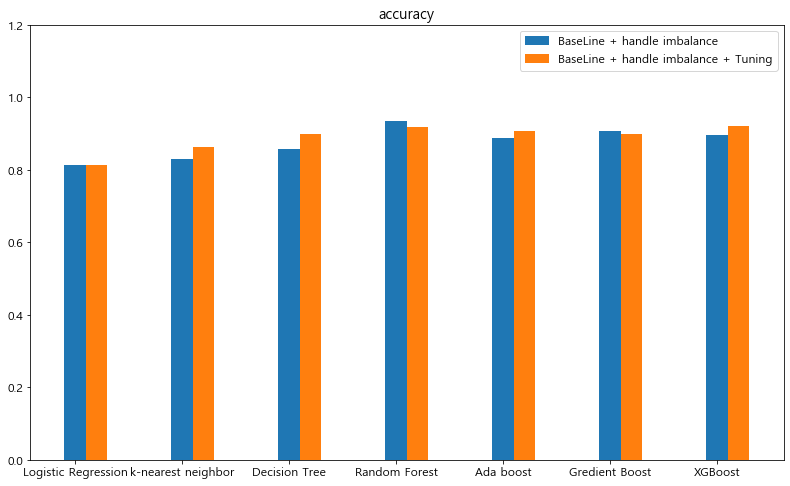

In [51]:
compare_to("accuracy") # accuracy, precision, recall, F1, Area under precision Recall 

,Logistic Regression,k-nearest neighbor,Decision Tree,Random Forest,Ada boost,Gredient Boost,XGBoost
F1,0.8065,0.8105,0.8516,0.9337,0.8835,0.9057,0.8913
F1_cv,0.8065,0.8680,0.8956,0.9151,0.9051,0.9016,0.9194


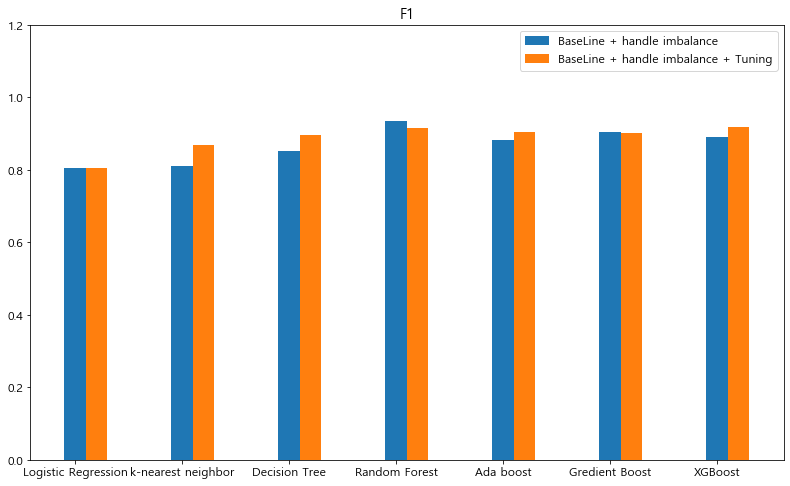

In [52]:
compare_to("F1") # accuracy, precision, recall, F1, Area under precision Recall 